In [33]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [34]:
data = pd.read_csv('./creditcard.csv')
data.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


Class
0    284315
1       492
Name: count, dtype: int64

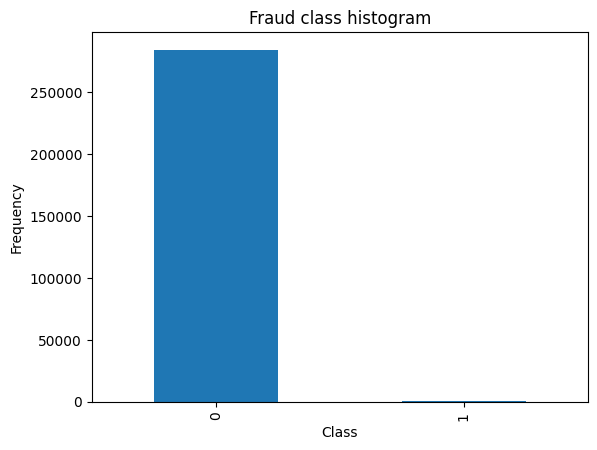

In [35]:
pd.value_counts(data['Class']).plot.bar()
plt.title('Fraud class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
data['Class'].value_counts()

In [36]:
from sklearn.preprocessing import StandardScaler

data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Time', 'Amount'], axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [37]:
# Separating features (X) and target (y)
X = np.array(data.loc[:, data.columns != 'Class'])  # Features, all columns except 'Class'
y = np.array(data.loc[:, data.columns == 'Class'])  # Target, only 'Class' column

print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (284807, 29)
Shape of y: (284807, 1)


# Undersampling

In [39]:
fraud_indices=np.array(data[data.Class==1].index)
no_records_fraud=len(fraud_indices)
print(no_records_fraud)

492


In [40]:
normal_indices=data[data.Class==0].index
random_normal_indices=np.random.choice(normal_indices,no_records_fraud*2,replace=False)
random_normal_indices=np.array(random_normal_indices)
print(len(random_normal_indices))

984


In [41]:
under_sample_indices=np.concatenate([fraud_indices,random_normal_indices])
print(len(under_sample_indices))

1476


In [42]:
under_sample_data=data.iloc[under_sample_indices,:]

In [43]:
under_sample_data.head()
under_sample_data.Class.value_counts()

Class
0    984
1    492
Name: count, dtype: int64

In [44]:
X_undersample=under_sample_data.iloc[:,under_sample_data.columns!='Class']
y_undersample=under_sample_data.iloc[:,under_sample_data.columns=='Class']

# Synthetic Minority Over-sampling Technique (SMOTE)

In [47]:
from imblearn.over_sampling import SMOTE

In [49]:
X_resample,y_resample=SMOTE().fit_resample(X_undersample,y_undersample.values.ravel())


In [52]:
y_resample=pd.DataFrame(y_resample)
X_resample=pd.DataFrame(X_resample)

print(X_resample.shape)
print(y_resample.shape)

(1968, 29)
(1968, 1)


# Undersampling + SMOTE

In [53]:
def undersampleAndSMOTE(dataset: pd.DataFrame, undersample_ratio: float = 2, smote_ratio: float = 0.1) -> tuple:
  data = dataset.copy()

  # Undersampling
  fraud_indices=np.array(data[data.Class==1].index)
  no_records_fraud=len(fraud_indices)
  normal_indices=data[data.Class==0].index
  random_normal_indices=np.random.choice(normal_indices,no_records_fraud*undersample_ratio,replace=False)
  random_normal_indices=np.array(random_normal_indices)
  under_sample_indices=np.concatenate([fraud_indices,random_normal_indices])
  under_sample_data=data.iloc[under_sample_indices,:]

  # SMOTE
  X_resample,y_resample=SMOTE().fit_resample(under_sample_data.iloc[:,under_sample_data.columns!='Class'],under_sample_data.iloc[:,under_sample_data.columns=='Class'])
  y_resample=pd.DataFrame(y_resample)
  X_resample=pd.DataFrame(X_resample)

  return X_resample, y_resample



In [55]:
data = pd.read_csv('./creditcard.csv')
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Time', 'Amount'], axis=1)


X, y = undersampleAndSMOTE(data, undersample_ratio=2, smote_ratio=0.1)

print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (1968, 29)
Shape of y: (1968, 1)
